<a target="_blank" href="https://colab.research.google.com/github/Wook22/Fake_News_Classification/blob/main/Fake_News_Analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Data Analysis on Fake News**

### Abstract




## Introduction

Have you ever questioned whether the news you see is real or not? Since the internet became widespread, fake news has increasingly been used as a tool to manipulate public opinion. One of the most well-known examples is the Nayirah testimony. On October 10, 1990, a 15-year-old Kuwaiti girl gave a false testimony before the United States Congressional Human Rights Caucus. She claimed to be a volunteer nurse at a Kuwaiti hospital during the Iraqi invasion. In her testimony, she said she witnessed Iraqi soldiers removing premature babies from incubators, stealing the equipment, and leaving the babies to die on the floor. This emotional account played a significant role in shaping public support and helped President George H. W. Bush justify military action against Iraq.

However,

"was shown to be almost certainly false by an ABC reporter, John Martin, in March 1991" (The New York Times)

In January 1992, it was revealed that she had never been a nurse and was, in fact, the daughter of Saud Nasser Al-Saud Al-Sabah, the Kuwaiti ambassador to the United States at the time of her testimony. This raises an important question: What should we believe, and what should we not? In an age where misinformation can spread quickly, it's becoming increasingly difficult to know what is true and what is not.

Throughout this project, I will develop a model that predicts whether a news article is real or fake based on the count of phrases and language used in the text.





## Data Description



In [1]:
df_real = read.csv("BuzzFeed_real_news_content.csv")
df_fake = read.csv("BuzzFeed_fake_news_content.csv")

In [3]:
colnames(df_real)

[1] "id"             "title"          "text"           "url"           
 [5] "top_img"        "authors"        "source"         "publish_date"  
 [9] "movies"         "images"         "canonical_link" "meta_data"

In [4]:
colnames(df_fake)

[1] "id"             "title"          "text"           "url"           
 [5] "top_img"        "authors"        "source"         "publish_date"  
 [9] "movies"         "images"         "canonical_link" "meta_data"

In [5]:
df_real["real_fake"] = 0
df_fake["real_fake"] = 1

buzzfeed = rbind(df_real, df_fake)

In [6]:
install.packages(c("tidytext", "dplyr", "stringr", "tidyr"))

# Load necessary libraries
library(dplyr)
library(stringr)
library(tidytext)
library(tidyr)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
# Create temporary dataset
df <- buzzfeed

# Tokenize text and count word frequencies
all_words <- df %>%
  select(text) %>%
  unnest_tokens(word, text) %>%
  count(word, sort = TRUE)

# Function to estimate syllables by counting vowel groups
estimate_syllables <- function(word) {
  str_count(tolower(word), "[aeiouy]+")
}

# Add syllable counts
all_words <- all_words %>%
  mutate(syllables = estimate_syllables(word)) %>%
  filter(syllables > 2)

# Get top 30 words with more than 3 syllables
top50_words <- head(all_words$word, 30)

# Function to count word occurrences in text
count_word <- function(text, word) {
  str_count(tolower(text), fixed(tolower(word)))
}

# Create new columns for each top word
for (w in top50_words) {
  df[[paste0("word_", w)]] <- sapply(df$text, count_word, word = w)
}

In [8]:
# Remove columns by name
df_drop <- df %>%
  select(-title, -source, -publish_date, -id, -text, -url, -top_img, -movies, -images, -canonical_link, -meta_data)

In [9]:
colnames(df_drop)

[1] "authors"           "real_fake"         "word_hillary"     
 [4] "word_president"    "word_debate"       "word_obama"       
 [7] "word_police"       "word_because"      "word_american"    
[10] "word_presidential" "word_before"       "word_america"     
[13] "word_election"     "word_republican"   "word_foundation"  
[16] "word_according"    "word_every"        "word_september"   
[19] "word_united"       "word_another"      "word_political"   
[22] "word_candidate"    "word_americans"    "word_national"    
[25] "word_charlotte"    "word_democratic"   "word_policy"      
[28] "word_something"    "word_washington"   "word_nominee"     
[31] "word_security"     "word_federal"

In [10]:
print(colSums(is.na(df_drop)))


          authors         real_fake      word_hillary    word_president 
                0                 0                 0                 0 
      word_debate        word_obama       word_police      word_because 
                0                 0                 0                 0 
    word_american word_presidential       word_before      word_america 
                0                 0                 0                 0 
    word_election   word_republican   word_foundation    word_according 
                0                 0                 0                 0 
       word_every    word_september       word_united      word_another 
                0                 0                 0                 0 
   word_political    word_candidate    word_americans     word_national 
                0                 0                 0                 0 
   word_charlotte   word_democratic       word_policy    word_something 
                0                 0                

In [11]:
df_dropna <- df_drop %>%
  filter(
    !is.na(authors),
    trimws(authors) != "",
    trimws(authors) != "View All Posts"
  )

buzzfeed_data <- df_dropna
head(buzzfeed_data)

,authors,real_fake,word_hillary,word_president,word_debate,word_obama,word_police,word_because,word_american,word_presidential,⋯,word_americans,word_national,word_charlotte,word_democratic,word_policy,word_something,word_washington,word_nominee,word_security,word_federal
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,"View All Posts,Leonora Cravotta",0,1,1,0,0,2,0,0,0,⋯,0,2,0,0,0,0,0,0,0,0
2,"More Candace,Adam Kelsey,Abc News,More Adam",0,0,1,0,0,5,1,11,1,⋯,8,0,1,0,0,0,0,2,0,0
3,Cassy Fiano,0,0,0,0,9,0,1,1,0,⋯,1,3,0,0,0,2,0,0,2,0
4,"Jack Shafer,Erick Trickey,Zachary Karabell",0,3,1,1,1,0,0,5,0,⋯,1,1,0,3,0,0,0,0,1,0
5,"John Parkinson,More John,Abc News,More Alexander",0,1,7,0,5,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
6,Cassy Fiano,0,1,0,0,0,4,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


## Data Analysis using Logistic Regression Model

**Problem:**

Can we predict whether a news article is real or fake using the most frequent words in the article text?

**Dataset:**

*   Target: real_fake (binary: 1 = real, 0 = fake)
*   Predictors: Word frequency counts for top 50 words (word_hillary, word_president, etc.)
*   Other metadata: title, authors, publish_date, etc.



In [12]:
buzzfeed_data$authors

[1] "View All Posts,Leonora Cravotta"                                                                                                        
  [2] "More Candace,Adam Kelsey,Abc News,More Adam"                                                                                            
  [3] "Cassy Fiano"                                                                                                                            
  [4] "Jack Shafer,Erick Trickey,Zachary Karabell"                                                                                             
  [5] "John Parkinson,More John,Abc News,More Alexander"                                                                                       
  [6] "Cassy Fiano"                                                                                                                            
  [7] "More Veronica,Ryan Struyk,More Ryan,Meghan Keneally,More Shushannah,Abc News,More Meghan,Veronica Stracqualursi"                        
  [8] "More Michael,Abc News"                                                                                                                  
  [9] "Ashley Killough"                                                                                                                        
 [10] "Jack Shafer,Steven Shepard,Glenn Thrush,Nolan D,Shane Goldmacher"                                                                       
 [11] "Jack Shafer,Jeff Greenfield"                                                                                                            
 [12] "Mj Lee,Cnn National Politics Reporter"                                                                                                  
 [13] "Jack Shafer,Politico Staff,Kyle Cheney"                                                                                                 
 [14] "More Josh,Abc News,Josh Margolin"                                                                                                       
 [15] "Grant Stern,Brett Bose,Natalie Dickinson"                                                                                               
 [16] "Tom Lobianco"                                                                                                                           
 [17] "Philip Hodges,View All Posts"                                                                                                           
 [18] "Jack Shafer,Louis Nelson"                                                                                                               
 [19] "Terresa Monroe-hamilton"                                                                                                                
 [20] "Jack Shafer,Yousef Saba"                                                                                                                
 [21] "Philip Hodges,View All Posts"                                                                                                           
 [22] "Madeline Conway,Burgess Everett,Katie Glueck,Jack Shafer"                                                                               
 [23] "Joyce Tseng,Eli Watkins"                                                                                                                
 [24] "Jack Shafer,Louis Nelson"                                                                                                               
 [25] "Jack Shafer,Nolan D"                                                                                                                    
 [26] "Jack Shafer,Michael Hirsh,Mikhail Zygar,Bruce Blair,Peter Edelman,Adam Walinsky"                                                        
 [27] "Terresa Monroe-hamilton"                                                                                                                
 [28] "Eric Bradner"                                                                                              

In [13]:
# Extract the first author from the authors column
buzzfeed_data$first_author <- sapply(strsplit(as.character(buzzfeed_data$authors), ","), function(x) {
  x <- trimws(x)                    # remove extra spaces
  x <- x[x != "View All Posts"]     # remove "View All Posts"
  if (length(x) > 0) x[1] else NA   # return first valid name or NA
})


In [14]:
buzzfeed_data$first_author

[1] "Leonora Cravotta"           "More Candace"              
  [3] "Cassy Fiano"                "Jack Shafer"               
  [5] "John Parkinson"             "Cassy Fiano"               
  [7] "More Veronica"              "More Michael"              
  [9] "Ashley Killough"            "Jack Shafer"               
 [11] "Jack Shafer"                "Mj Lee"                    
 [13] "Jack Shafer"                "More Josh"                 
 [15] "Grant Stern"                "Tom Lobianco"              
 [17] "Philip Hodges"              "Jack Shafer"               
 [19] "Terresa Monroe-hamilton"    "Jack Shafer"               
 [21] "Philip Hodges"              "Madeline Conway"           
 [23] "Joyce Tseng"                "Jack Shafer"               
 [25] "Jack Shafer"                "Jack Shafer"               
 [27] "Terresa Monroe-hamilton"    "Eric Bradner"              
 [29] "Sierra Marlee"              "Jack Shafer"               
 [31] "Barbara Starr"              "Latest Posts"              
 [33] "Hadas Gold"                 "Abc News"                  
 [35] "David Wright"               "Abc News"                  
 [37] "Eli Watkins"                "Hadas Gold"                
 [39] "Onan Coca"                  "Dan Merica"                
 [41] "Jack Shafer"                "Kevin Liptak"              
 [43] "Laura Koran"                "Jeremy Diamond"            
 [45] "Jack Shafer"                "Oliver Willis"             
 [47] "Latest Posts"               "Jack Shafer"               
 [49] "Deirdre Walsh"              "Sierra Marlee"             
 [51] "Jack Shafer"                "Brianna Ehley"             
 [53] "Oliver Willis"              "Philip Hodges"             
 [55] "Nick Gass"                  "John Hawkins"              
 [57] "Dan Merica"                 "Josh Gerstein"             
 [59] "Ryan Browne"                "More Meghan"               
 [61] "Jack Shafer"                "Josh Gerstein"             
 [63] "Manu Raju"                  "Jack Shafer"               
 [65] "Dominique Debucquoy-dodley" "Jack Shafer"               
 [67] "John Couwels"               "Rika Christensen"          
 [69] "Betsy Klein"                "Jack Shafer"               
 [71] "Steven Shepard"             "Leonora Cravotta"          
 [73] "Brian Stelter"              "Nick Gass"                 
 [75] "More Stephanie"             "Jack Shafer"               
 [77] "Nick Gass"                  "Kevin Liptak"              
 [79] "Eric Bradner"               "Jack Shafer"               
 [81] "Jeff Dunetz"                "Edward-isaac Dovere"       
 [83] "Tal Kopan"                  "Jack Shafer"               
 [85] "Wendy Gittleson"            "Tony Elliott"              
 [87] "John Prager"                "Philip Hodges"             
 [89] "Fed Up"                     "Matt Barber"               
 [91] "Crispin White"              "Bob Amoroso"               
 [93] "Tony Elliott"               "Kevin Jackson"             
 [95] "Bob Amoroso"                "Campus Reform"             
 [97] "Dale Summitt"               "Jim Bowman"                
 [99] "Elvin Bartley"              "Fed Up"                    
[101] "Stephen D Foster Jr"        "Rich Witmer"               
[103] "Blair Patterson"            "Wendy Gittleson"           
[105] "Blair Patterson"            "Grant Stern"               
[107] "Colin Taylor"               "Grant Stern"               
[109] "Grant Stern"                "Colin Taylor"              
[111] "Grant Stern"                "Tiffiny Ruegner"           
[113] "Terresa Monroe-hamilton"    "Cassy Fiano"               
[115] "Tiffiny Ruegner"            "Philip Hodges"             
[117] "Sierra Marlee"              "Mockarena Cotr"            
[119] "Sierra Marlee"              "Terresa Monroe-hamilton"   
[121] "Terresa Monroe-hamilton"    "Ryan Denson"               
[123] "Martin Lioll"               "Scott Osborn"              
[125] "Sierra Marlee"             

In [15]:
# Convert categorical variables to factors
buzzfeed_data$first_author <- as.factor(buzzfeed_data$first_author)


In [16]:
nrow(df)
nrow(df_drop)
nrow(df_dropna)
nrow(buzzfeed_data)


[1] 182

[1] 182

[1] 138

[1] 138

In [17]:
# Fit full model
model_full <- glm(real_fake ~ ., data = df_drop %>% select(real_fake, starts_with("word_")), family = binomial)
summary(model_full)


Call:
glm(formula = real_fake ~ ., family = binomial, data = df_drop %>% 
    select(real_fake, starts_with("word_")))

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)   
(Intercept)        0.440460   0.327169   1.346  0.17821   
word_hillary       0.266105   0.089689   2.967  0.00301 **
word_president    -0.064753   0.157755  -0.410  0.68147   
word_debate       -0.166217   0.121317  -1.370  0.17065   
word_obama         0.017436   0.103830   0.168  0.86664   
word_police       -0.038328   0.135362  -0.283  0.77706   
word_because       0.489868   0.243744   2.010  0.04446 * 
word_american     -0.116989   0.358935  -0.326  0.74447   
word_presidential -0.248344   0.365377  -0.680  0.49670   
word_before       -0.080731   0.243101  -0.332  0.73982   
word_america       0.009173   0.188798   0.049  0.96125   
word_election     -0.149069   0.195227  -0.764  0.44512   
word_republican    0.222320   0.158252   1.405  0.16007   
word_foundation    0.194467   0.124447 

Use stepwise selection based on AIC

In [18]:
# Variable Selection (Best Subset)
# Perform stepwise selection silently
suppressMessages({
  model_best <- step(model_full, direction = "both", trace = 0)
})

# Show summary of the best model
summary(model_best)


Call:
glm(formula = real_fake ~ word_hillary + word_because + word_foundation + 
    word_september + word_candidate + word_washington + word_nominee, 
    family = binomial, data = df_drop %>% select(real_fake, starts_with("word_")))

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)      0.002078   0.232369   0.009  0.99287   
word_hillary     0.245275   0.079848   3.072  0.00213 **
word_because     0.419138   0.205564   2.039  0.04145 * 
word_foundation  0.204499   0.122965   1.663  0.09630 . 
word_september  -0.378342   0.199557  -1.896  0.05797 . 
word_candidate  -0.491847   0.208352  -2.361  0.01824 * 
word_washington -0.469565   0.312426  -1.503  0.13285   
word_nominee    -0.774788   0.347108  -2.232  0.02561 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 252.31  on 181  degrees of freedom
Residual deviance: 207.09  on 174  degrees of freedom
AI

In [19]:
# Likelihood ratio test
anova(model_best, test = "Chisq")


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,181,252.3056,NA
word_hillary,1,7.96336248,180,244.3422,4.773366e-03
word_because,1,0.01252443,179,244.3297,9.108927e-01
word_foundation,1,2.94322715,178,241.3865,8.623828e-02
word_september,1,5.84732907,177,235.5391,1.560071e-02
word_candidate,1,18.95119001,176,216.5879,1.341056e-05
word_washington,1,4.00889588,175,212.5790,4.526078e-02
word_nominee,1,5.49137346,174,207.0877,1.911052e-02


In [20]:
confint(model_best)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-0.450798549,0.46278393
word_hillary,0.104694732,0.41834485
word_because,0.030433545,0.83640150
word_foundation,0.003543752,0.50233709
word_september,-0.842552145,-0.01573412
word_candidate,-0.961081520,-0.13731095
word_washington,-1.171697507,0.01879687
word_nominee,-1.491911438,-0.12235544


In [21]:
# Predict probabilities for the 'real_fake' outcome
pred_probs <- predict(model_best, newdata = df_drop, type = "response")


In [26]:
# Predicted class using cutoff = 0.5
predicted_class <- ifelse(pred_probs > 0.5, 1, 0)

# Confusion matrix
confusion_matrix <- table(Predicted = predicted_class, Actual = df_drop$real_fake)
print(confusion_matrix)

         Actual
Predicted  0  1
        0 59 21
        1 32 70


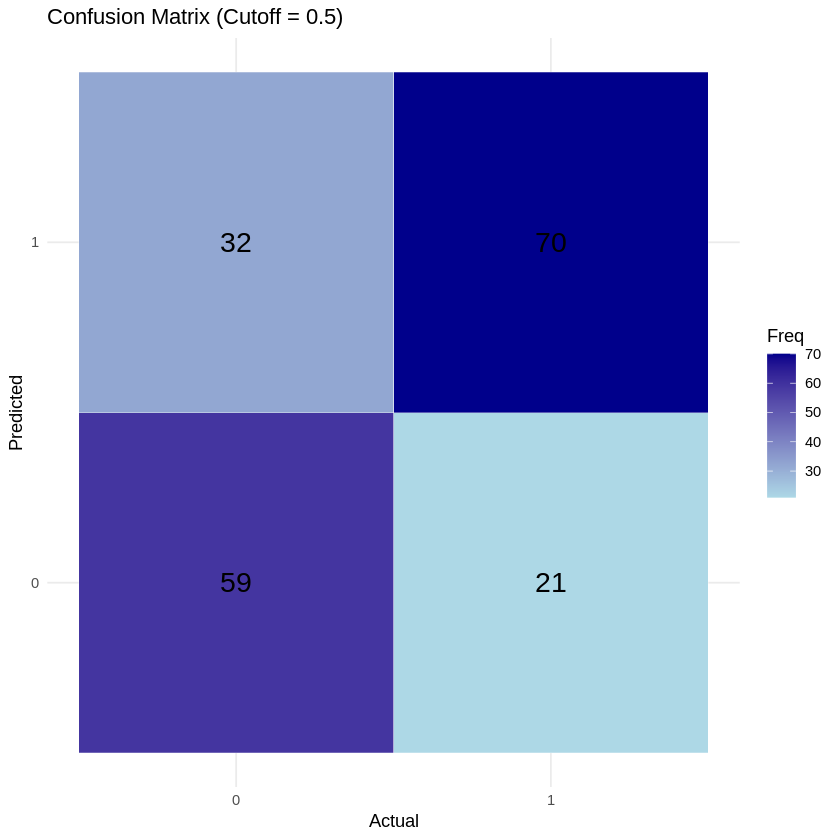

In [29]:
library(ggplot2)

# Create confusion matrix
cm <- table(Predicted = predicted_class, Actual = actual_class)

# Convert to dataframe for ggplot
cm_df <- as.data.frame(cm)
colnames(cm_df) <- c("Predicted", "Actual", "Freq")

# Plot heatmap
ggplot(data = cm_df, aes(x = Actual, y = Predicted, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq), size = 6) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Confusion Matrix (Cutoff = 0.5)", x = "Actual", y = "Predicted") +
  theme_minimal()

In [25]:
# Function to compute metrics
get_metrics <- function(predictions, actual) {
  cm <- table(Predicted = predictions, Actual = actual)

  # Ensure 2x2 confusion matrix
  tn <- ifelse("0" %in% rownames(cm) && "0" %in% colnames(cm), cm["0", "0"], 0)
  tp <- ifelse("1" %in% rownames(cm) && "1" %in% colnames(cm), cm["1", "1"], 0)
  fn <- ifelse("0" %in% rownames(cm) && "1" %in% colnames(cm), cm["0", "1"], 0)
  fp <- ifelse("1" %in% rownames(cm) && "0" %in% colnames(cm), cm["1", "0"], 0)

  sensitivity <- tp / (tp + fn)  # True Positive Rate
  specificity <- tn / (tn + fp)  # True Negative Rate
  accuracy <- (tp + tn) / sum(cm)

  return(c(specificity = specificity, sensitivity = sensitivity, accuracy = accuracy))
}

# Sequence of cutoff values
cutoffs <- seq(0.25, 0.9, by = 0.05)

# Store results
results <- data.frame(Cutoff = numeric(), Specificity = numeric(), Sensitivity = numeric(), Accuracy = numeric())

for (cutoff in cutoffs) {
  predictions <- ifelse(pred_probs > cutoff, 1, 0)
  metrics <- get_metrics(predictions, df_drop$real_fake)
  results <- rbind(results, data.frame(Cutoff = cutoff,
                                       Specificity = round(metrics["specificity"], 6),
                                       Sensitivity = round(metrics["sensitivity"], 6),
                                       Accuracy = round(metrics["accuracy"], 6)))
}

print(results)

              Cutoff Specificity Sensitivity Accuracy
specificity     0.25    0.252747    0.956044 0.604396
specificity1    0.30    0.318681    0.956044 0.637363
specificity2    0.35    0.373626    0.923077 0.648352
specificity3    0.40    0.450549    0.835165 0.642857
specificity4    0.45    0.582418    0.824176 0.703297
specificity5    0.50    0.648352    0.769231 0.708791
specificity6    0.55    0.780220    0.560440 0.670330
specificity7    0.60    0.802198    0.505495 0.653846
specificity8    0.65    0.890110    0.384615 0.637363
specificity9    0.70    0.923077    0.318681 0.620879
specificity10   0.75    0.956044    0.263736 0.609890
specificity11   0.80    0.978022    0.208791 0.593407
specificity12   0.85    1.000000    0.142857 0.571429
specificity13   0.90    1.000000    0.120879 0.560440


In [24]:
# Find best cut-off point (Youden's Index maximization)
best_cutoff <- coords(roc_curve, "best", ret = "threshold")
best_cutoff

threshold
<dbl>
0.481395


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7628

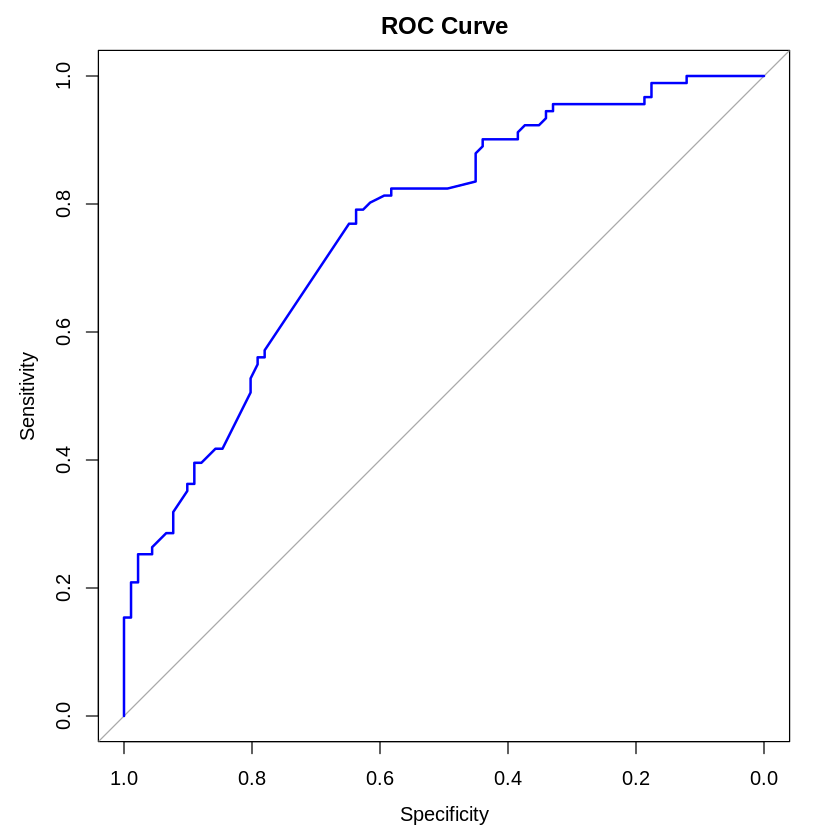

In [23]:
install.packages("pROC")
library(pROC)

# Generate ROC curve
roc_curve <- roc(df_drop$real_fake, pred_probs)
plot(roc_curve, main = "ROC Curve", col = "blue")

# Compute AUC
auc(roc_curve)

In [9]:
# Load necessary packages
install.packages("boot")
library(boot)

# Example logistic regression models on df_drop
fit0 <- glm(real_fake ~ word_hillary, family = binomial, data = df_drop)
fit1 <- glm(real_fake ~ word_hillary + word_candidate, family = binomial, data = df_drop)
fit2 <- glm(real_fake ~ word_hillary + word_candidate + word_nominee, family = binomial, data = df_drop)

# Define custom cost function: classify correctly if |prediction - actual| <= 0.5
cost <- function(r, pi = 0) mean(abs(r - pi) > 0.5)

# 10-fold cross-validation
out0 <- cv.glm(df_drop, fit0, cost, K = 10)
out1 <- cv.glm(df_drop, fit1, cost, K = 10)
out2 <- cv.glm(df_drop, fit2, cost, K = 10)

# Print cross-validation error estimates
out0$delta
out1$delta
out2$delta

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.4505495 0.4505495

[1] 0.4450549 0.4395604

[1] 0.3516484 0.3533088

In [14]:
# Fit Probit regression model using the probit link
fit_probit <- glm(real_fake ~ word_hillary + word_because + word_foundation +
                    word_september + word_candidate + word_washington + word_nominee, data = df_drop, family = binomial(link = "probit"))

# View summary of the model
summary(fit_probit)


Call:
glm(formula = real_fake ~ word_hillary + word_because + word_foundation + 
    word_september + word_candidate + word_washington + word_nominee, 
    family = binomial(link = "probit"), data = df_drop)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)   
(Intercept)     -0.00340    0.14189  -0.024  0.98088   
word_hillary     0.14816    0.04570   3.242  0.00119 **
word_because     0.25311    0.11957   2.117  0.03427 * 
word_foundation  0.12471    0.06883   1.812  0.06999 . 
word_september  -0.22512    0.11592  -1.942  0.05212 . 
word_candidate  -0.30320    0.11782  -2.573  0.01007 * 
word_washington -0.27201    0.17433  -1.560  0.11870   
word_nominee    -0.45015    0.20456  -2.201  0.02777 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 252.31  on 181  degrees of freedom
Residual deviance: 206.72  on 174  degrees of freedom
AIC: 222.72

Number of Fisher Scoring 

In [16]:
# Fit model with Identity link
fit_identity <- glm(real_fake ~ word_hillary + word_because + word_foundation +
                    word_september + word_candidate + word_washington + word_nominee, data = df_drop
                  , family = gaussian(link = "identity"))

# View summary of the model
summary(fit_identity)


Call:
glm(formula = real_fake ~ word_hillary + word_because + word_foundation + 
    word_september + word_candidate + word_washington + word_nominee, 
    family = gaussian(link = "identity"), data = df_drop)

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.49937    0.04655  10.729  < 2e-16 ***
word_hillary     0.03529    0.01008   3.501 0.000588 ***
word_because     0.07598    0.03481   2.183 0.030399 *  
word_foundation  0.03343    0.01685   1.983 0.048905 *  
word_september  -0.06526    0.03303  -1.976 0.049739 *  
word_candidate  -0.06768    0.02741  -2.469 0.014510 *  
word_washington -0.07612    0.03786  -2.011 0.045908 *  
word_nominee    -0.11600    0.05499  -2.109 0.036349 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2106017)

    Null deviance: 45.500  on 181  degrees of freedom
Residual deviance: 36.645  on 174  degrees of freedom
AIC: 242.8

Number 

## Reference

* Opinion | Remember Nayirah, Witness for Kuwait? (Published 1992), www.nytimes.com/1992/01/06/opinion/remember-nayirah-witness-for-kuwait.html. Accessed 6 May 2025.
* Shu, Kai, et al. “FakeNewsNet: A Data Repository with News Content, Social Context and Spatialtemporal Information for Studying Fake News on Social Media.” arXiv.Org, 27 Mar. 2019, arxiv.org/abs/1809.01286.
* Mahudeswaran, Deepak. “FakeNewsNet.” Kaggle, 2 Nov. 2018, www.kaggle.com/datasets/mdepak/fakenewsnet/data.
